setup

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)




0.13.2


importing data

In [2]:
# print(sns.get_dataset_names())
crash_df=sns.load_dataset('car_crashes')
print(crash_df)

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
8     5.9     2.006    1.593           5.900        5.900      1273.89   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
10   15.6     2.964    3.900          14.820       14.508       913.15   
11   17.5     9.450    7.175          14.350       15.225       861.18   
12   15.3     5.508    4.437          

Distribution plot


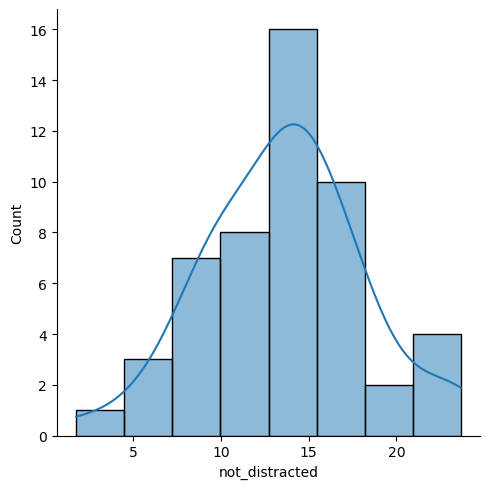

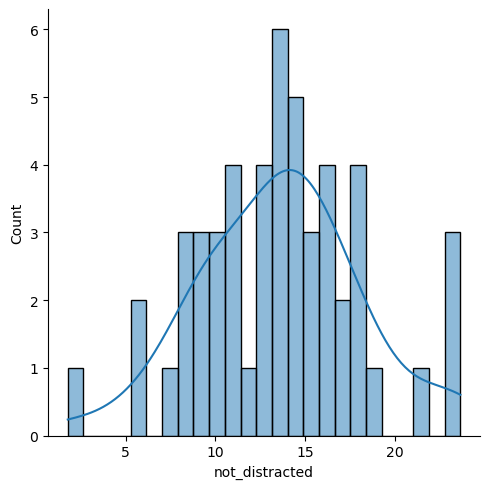

In [3]:
# distplot is a depriciated function and instead of it displot is used 
# sns.distplot(crash_df['not_distracted'],bins=25)
sns.displot(crash_df['not_distracted'],kde=True)
sns.displot(crash_df['not_distracted'],kde=True,bins=25)

Joint Plots

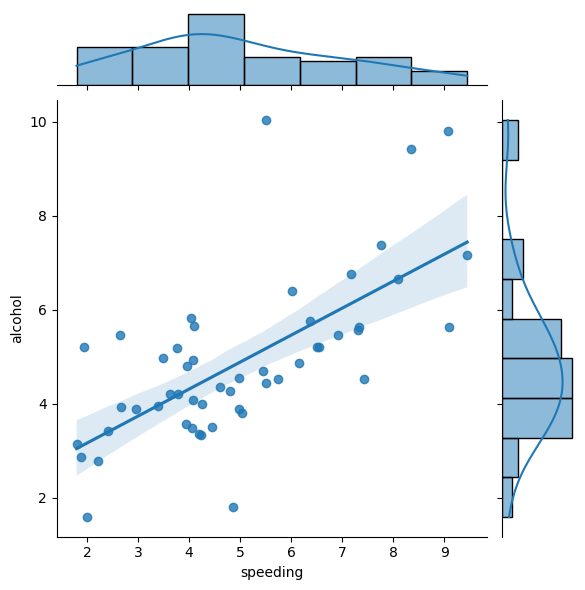

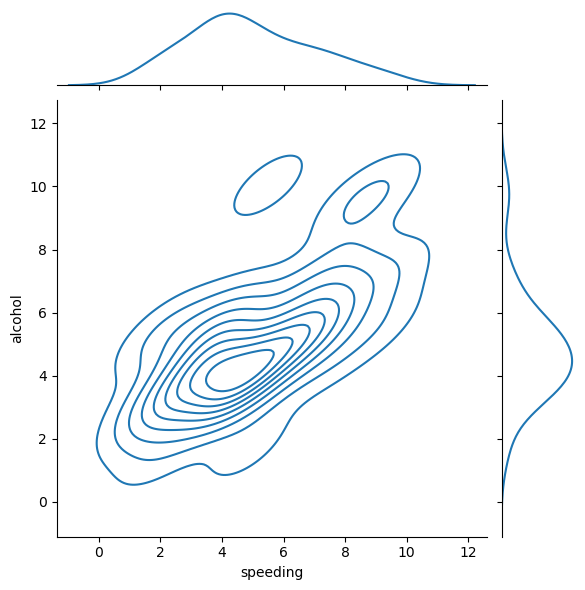

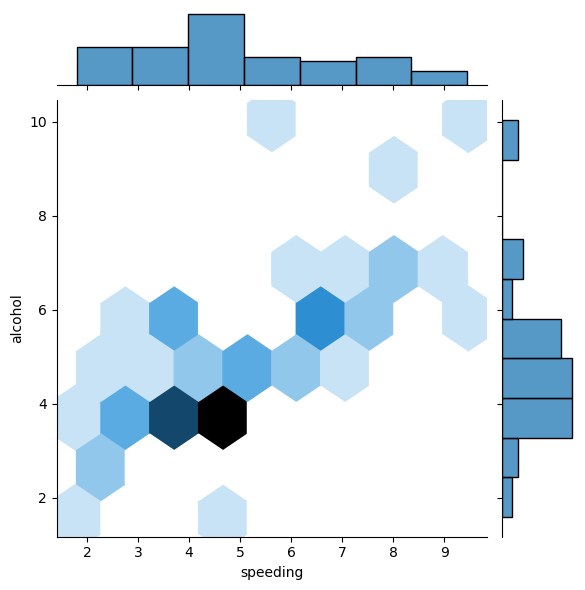

In [4]:
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='kde')
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='hex')

KDE Plots

<Axes: xlabel='alcohol', ylabel='Density'>

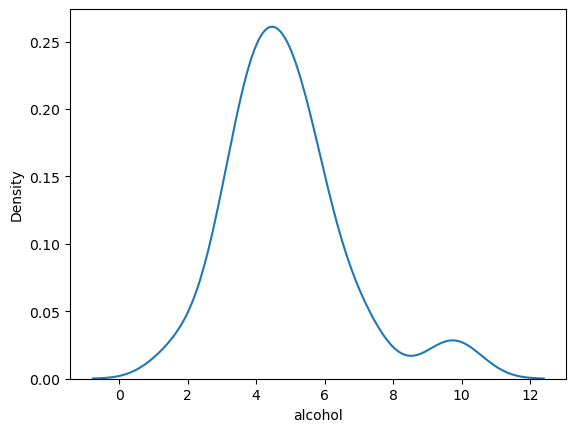

In [5]:
sns.kdeplot(crash_df['alcohol'])

pair plots

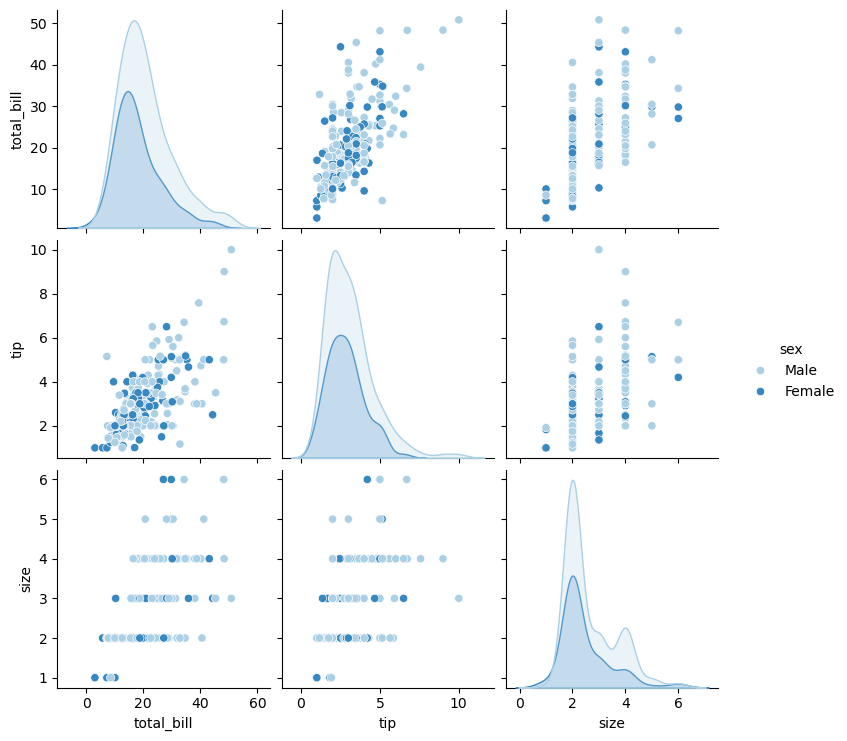

In [6]:
# sns.pairplot(crash_df)
tips_df=sns.load_dataset('tips')
# print(tips_df)
sns.pairplot(tips_df,hue='sex',palette='Blues')

Rug Plots

<Axes: xlabel='tip'>

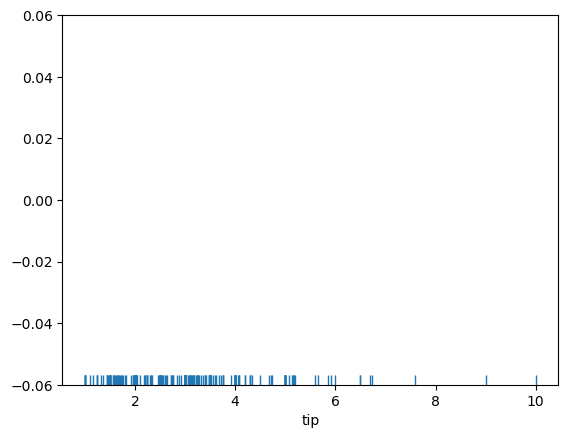

In [7]:
sns.rugplot(tips_df['tip'])



Styling

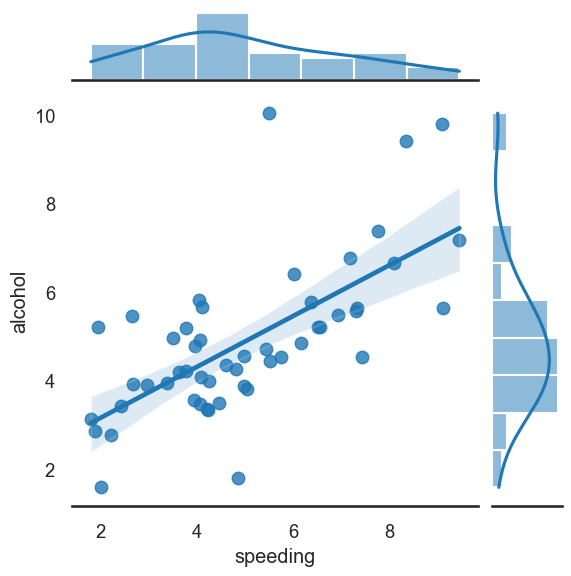

In [8]:
sns.set_style('white')
# plt.figure(figsize=(8,4))
sns.set_context('talk',font_scale=0.8)
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')
sns.despine(left=True)

## Categorical Plots

Bar Plots

<Axes: xlabel='sex', ylabel='total_bill'>

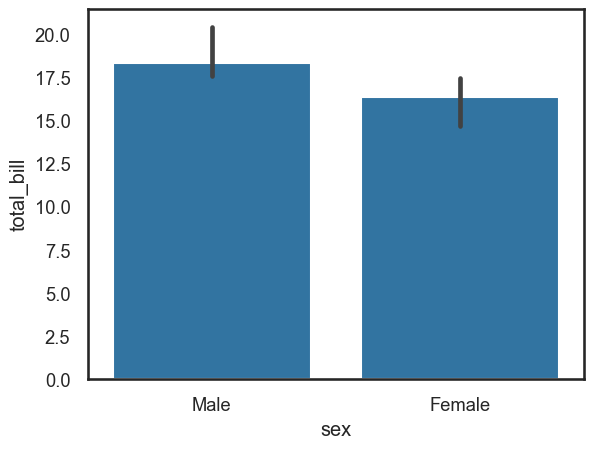

In [9]:
sns.barplot(x='sex',y='total_bill',data=tips_df,estimator=np.median)

count plot

<Axes: xlabel='sex', ylabel='count'>

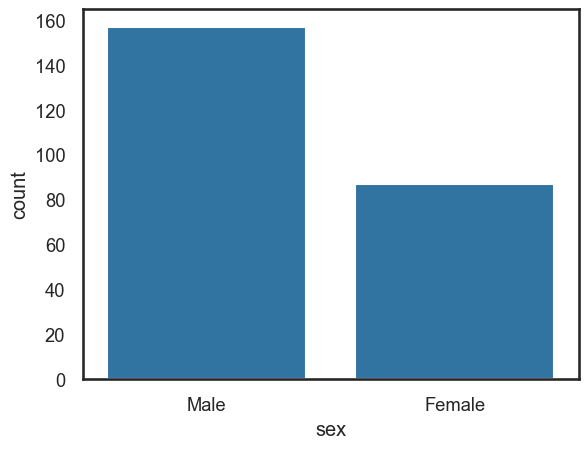

In [10]:
sns.countplot(x='sex', data=tips_df)

Box Plot

<Axes: xlabel='day', ylabel='total_bill'>

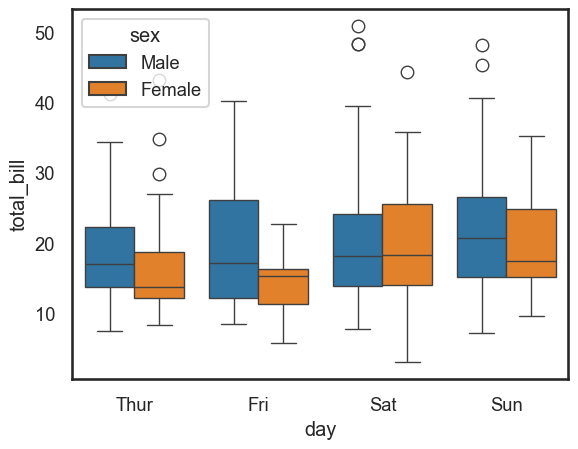

In [11]:
sns.boxplot(x='day',y='total_bill', data=tips_df,hue='sex')


Violine Plot

<Axes: xlabel='day', ylabel='total_bill'>

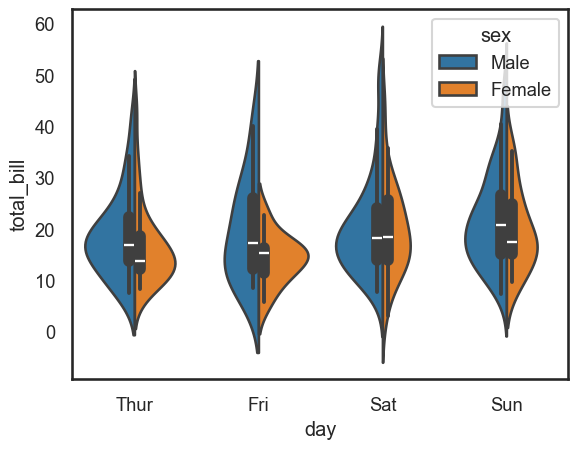

In [12]:
# sns.violinplot(x='day',y='total_bill',data=tips_df,hue='sex')
sns.violinplot(x='day',y='total_bill',data=tips_df,hue='sex',split=True)

Strip Plot

<Axes: xlabel='day', ylabel='total_bill'>

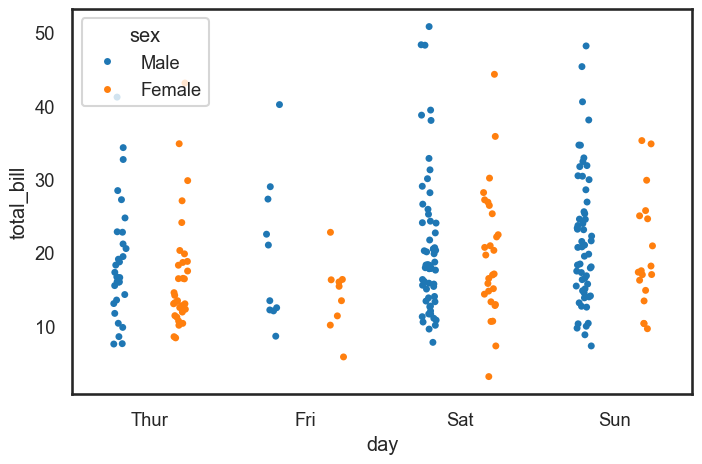

In [13]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='day',y='total_bill',data=tips_df,jitter=True,hue='sex',dodge=True)


Swarm Plot

<Axes: xlabel='day', ylabel='total_bill'>

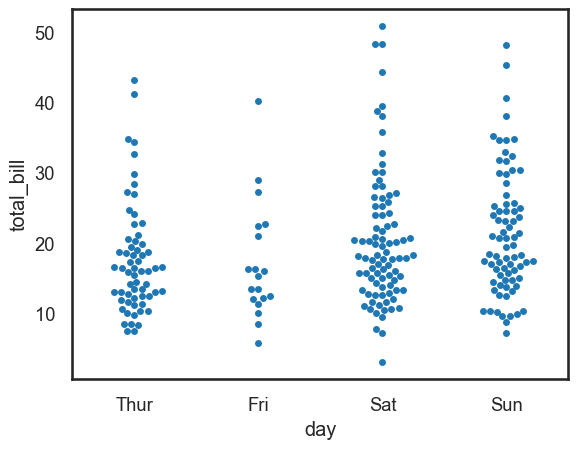

In [14]:
# sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df)

## Palettes

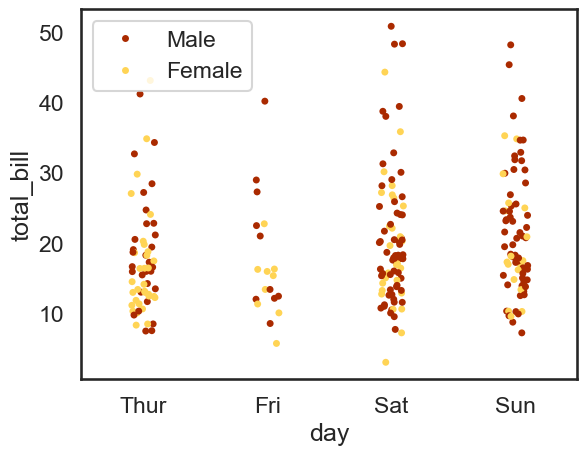

In [15]:
sns.set_style('white')
sns.set_context("talk")
sns.stripplot(x='day',y='total_bill',data=tips_df,hue='sex',palette='afmhot')
plt.legend(loc=0)

# Matrix Plots

Heatmaps

                   total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000  


<Axes: >

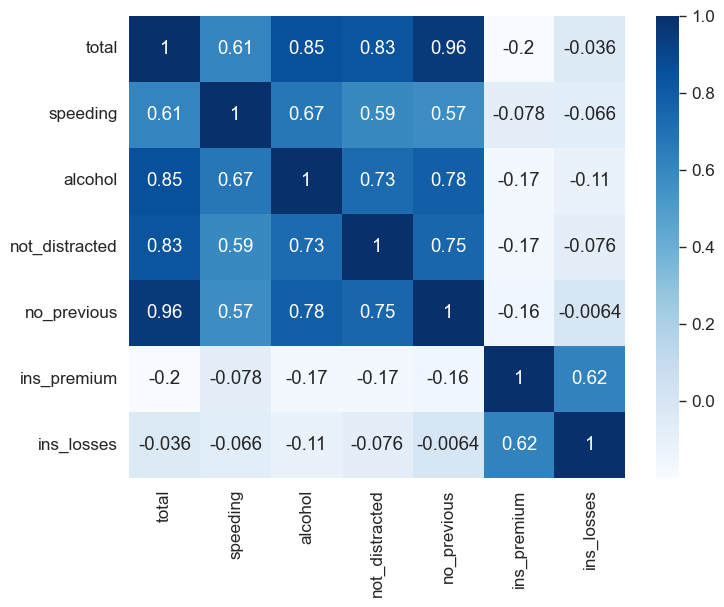

In [16]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

# converting df to a matrix form

# method 1
crash_mx=crash_df.drop(columns=['abbrev']).corr()
print(crash_mx)
sns.heatmap(crash_mx,annot=True,cmap='Blues')





C:\Users\arind\AppData\Local\Temp\ipykernel_28056\1712400029.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights=flights.pivot_table(index='month',columns='year',values='passengers')


<Axes: xlabel='year', ylabel='month'>

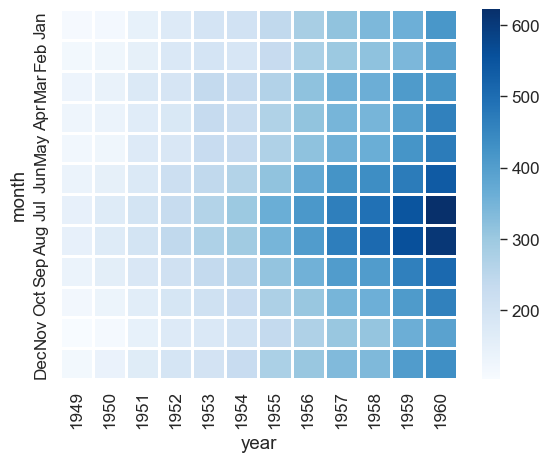

In [17]:
# method 2

flights=sns.load_dataset('flights')
flights=flights.pivot_table(index='month',columns='year',values='passengers')
# print(flights)
sns.heatmap(flights,cmap='Blues',linecolor='white',linewidths=1)

Cluster maps


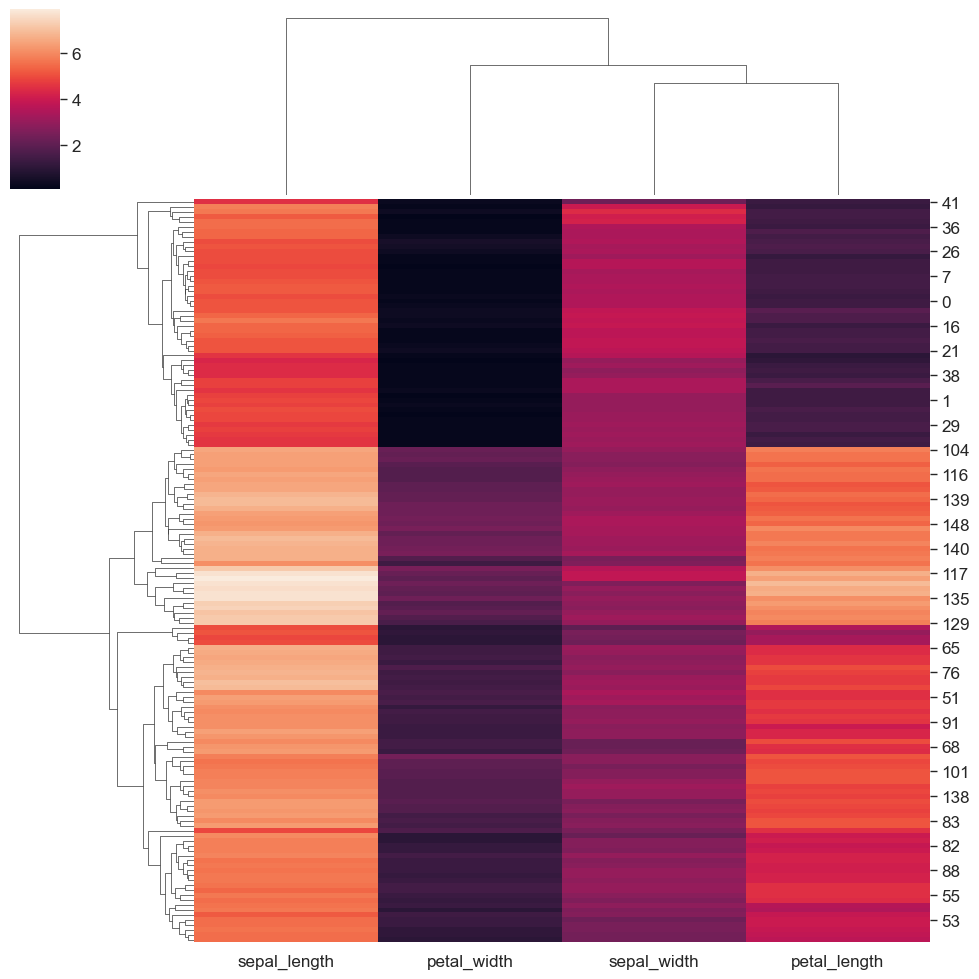

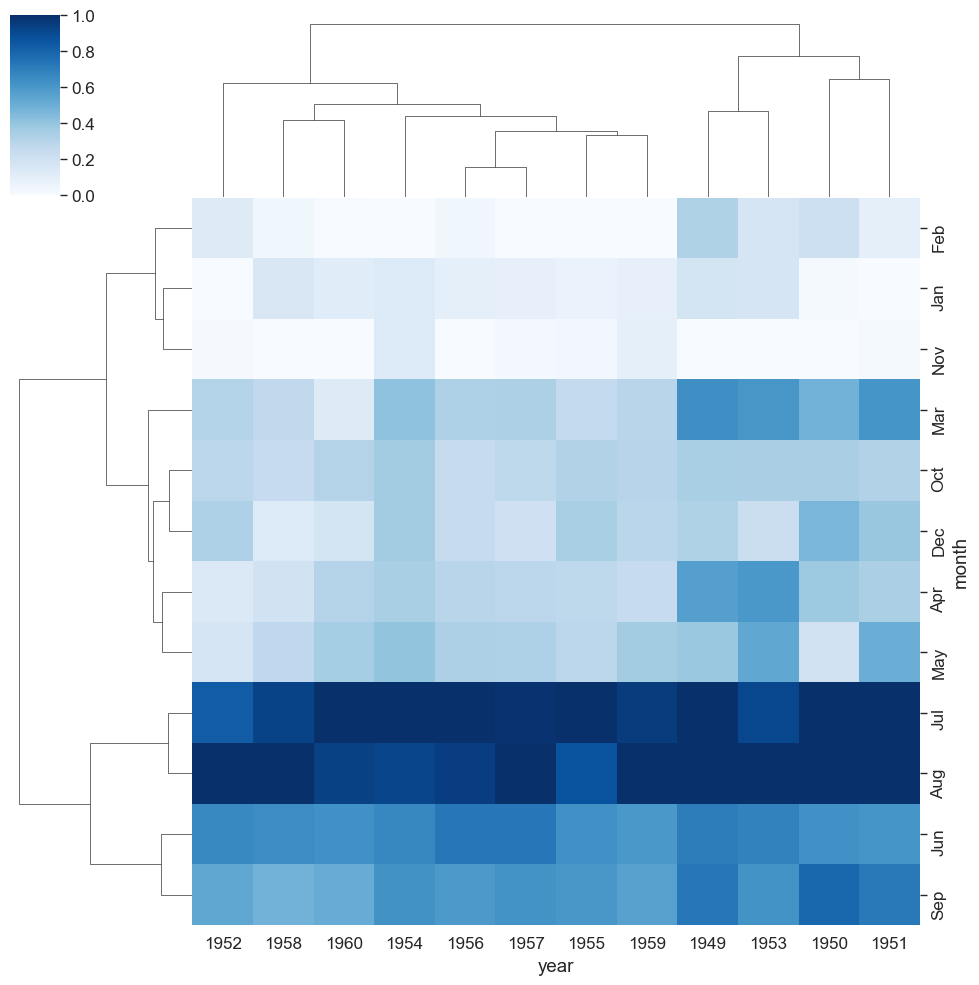

In [19]:
iris=sns.load_dataset('iris')
species=iris.pop('species')
sns.clustermap(iris) 
sns.clustermap(flights, cmap='Blues',standard_scale=1)

Pair Grid

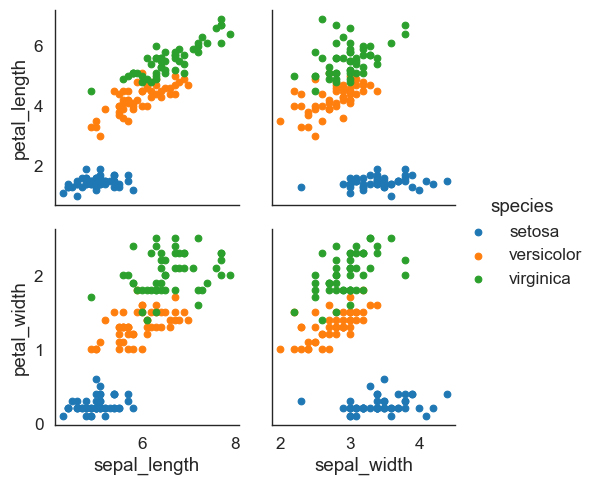

In [29]:
iris=sns.load_dataset('iris')
# iris_g=sns.PairGrid(iris, hue='species')
# # iris_g.map(plt.scatter)
# iris_g.map_diag(plt.hist)
# # iris_g.map_offdiag(plt.scatter)
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)
iris_g=sns.PairGrid(iris, hue='species',x_vars=['sepal_length','sepal_width'],y_vars=['petal_length','petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

Facet Grid

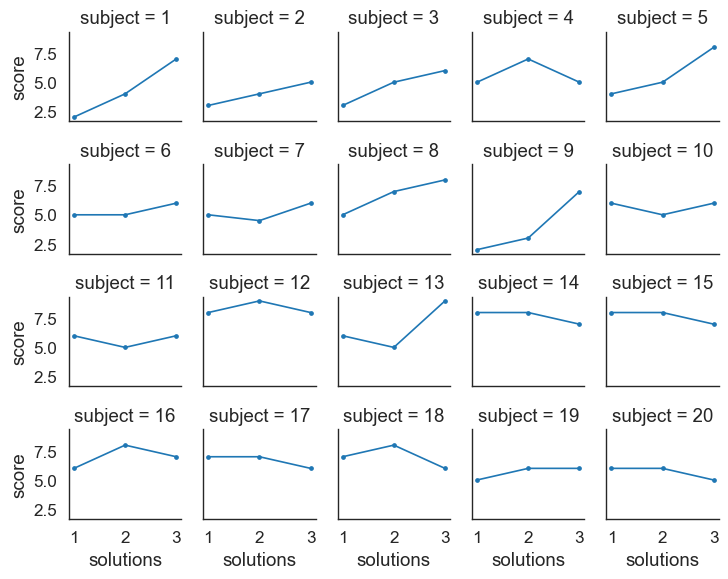

In [39]:
# tips_fg=sns.FacetGrid(tips_df, col='time',row='smoker')
# tips_fg.map(plt.scatter,'total_bill','tip')
# tips_fg=sns.FacetGrid(tips_df,col='time',hue='smoker',height=4,aspect=1.3)
# tips_fg.map(plt.scatter,'total_bill','tip',edgecolor='w')
# kws=dict(s=50,linewidth=.5,edgecolor='w')
# tips_fg=sns.FacetGrid(tips_df,col='sex',hue='smoker',height=4,aspect=1.3,hue_order=['Yes','No'],hue_kws=dict(marker=['^','v']))
# tips_fg.map(plt.scatter,'total_bill','tip',**kws)

att_df=sns.load_dataset('attention')
att_fg=sns.FacetGrid(att_df,col='subject',col_wrap=5,height=1.5)
att_fg.map(plt.plot,'solutions','score',marker='.')

Regression Plots

<Figure size 800x600 with 0 Axes>

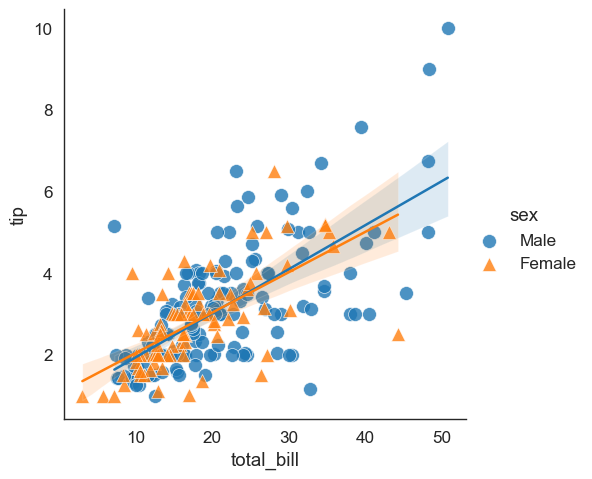

In [44]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips_df,markers=['o','^'],scatter_kws={'s':100,'linewidths':0.5,'edgecolor':'w'})

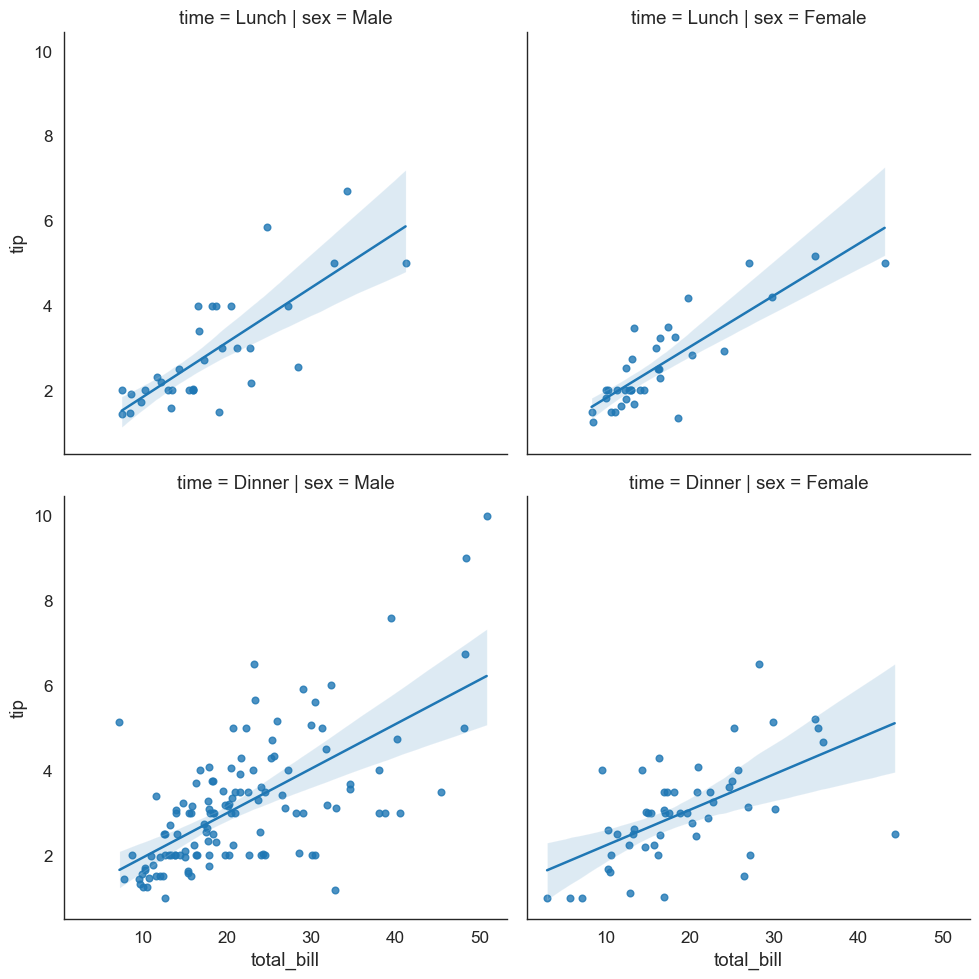

In [45]:
sns.lmplot(x='total_bill',y='tip',col='sex',row='time',data=tips_df)